### Regression, Prediction Car Prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("cars.xls")  
#Arabanın özelliklerine bakarak arabanın fiyatını tahmin edeceğiz.

# EDA - Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
df.sample(10)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
48,17394.021398,25464,Buick,Lesabre,Custom Sedan 4D,Sedan,6,3.8,4,1,1,0
274,11574.173813,21525,Chevrolet,Cavalier,Sedan 4D,Sedan,4,2.2,4,0,1,1
536,15253.868566,20917,Pontiac,Grand Am,GT Coupe 2D,Coupe,6,3.4,2,1,1,1
444,16507.070267,17451,Chevrolet,Malibu,Sedan 4D,Sedan,6,3.5,4,0,1,1
600,16391.926573,18096,Pontiac,Vibe,AWD Sportwagon 4D,Wagon,4,1.8,4,1,1,0
733,28328.266538,20685,SAAB,9_5 HO,Aero Wagon 4D,Wagon,4,2.3,4,1,0,1
702,29961.254939,20015,SAAB,9_5,Arc Wagon 4D,Wagon,4,2.3,4,1,1,1
382,25097.473249,14461,Chevrolet,Impala,SS Sedan 4D,Sedan,6,3.8,4,1,1,1
414,17553.753684,18451,Chevrolet,Malibu,LT MAXX Hback 4D,Hatchback,6,3.5,4,0,1,1
640,29246.237335,3907,SAAB,9_3,Linear Sedan 4D,Sedan,4,2.0,4,1,0,1


In [6]:
df.tail()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
803,13585.636802,35662,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0


In [7]:
df.describe() #Sayısal veriler.

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [8]:
df.corr()  #Bir sütunun diğer bir sutuna ne kadar bağlı olduğunu gösterir.
#Buradaki (-) olanlar ters orantı olduğunu söylüyor. Mesela Mileage ve Price arasındaki ilişki;
# Mileage arttıkça Price düşer.

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [9]:
abs(df.corr()["Price"]).sort_values(ascending=False) #sort_values sıralama yapar.
#Burada Price(Fiyat) ile ne kadar bağıntılı olan verileri sıraladık.
#ascending = False ile  veriler büyükten küçüğe sıralanır. True ile  veriler küçükten büyüğe sıralanır.

Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Mileage     0.143051
Doors       0.138750
Sound       0.124348
Name: Price, dtype: float64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

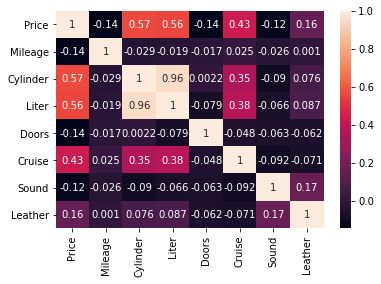

In [11]:
sns.heatmap(df.corr(),annot=True);

In [12]:
x=df[['Mileage','Cylinder','Liter','Cruise']] #Burada biz verilerden 4 tanesini aldık(%90 altı ve %20 üzeri) 
#Mileage(kilometre)' yi almamızın bizim araba fiyatları belirlerken genel olarak kilometrenin etkisi olduğunu zaten biliyoruz. Fakat burada veri az olduğu için korolasyonda Mileage düşük gösteriliyor.

In [13]:
x.head()

,Mileage,Cylinder,Liter,Cruise
0,8221,6,3.1,1
1,9135,6,3.1,1
2,13196,6,3.1,1
3,16342,6,3.1,1
4,19832,6,3.1,1


In [14]:
# x.to_csv("dd.csv") Burada yukarıda ki verilere bağlı excel dosyasını bu şekilde  oluştururuz.

In [15]:
x.shape  # shape 804 satıra 4 sütun olduğunu bize verir.

(804, 4)

In [16]:
y=df[['Price']]

In [17]:
y.shape

(804, 1)

In [18]:
y.head()

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324


In [19]:
from sklearn.linear_model import LinearRegression    
#Science Kit Learn(sklearn) linear_model içersinden LinearRegression'ı import ediyoruz.
from sklearn.model_selection import train_test_split 

In [20]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13) 
#test_size=Verinin %20 sini teste ayırıyor %80'ini öğretmeye ayırıyor.
#train eğiteceğim kadar veri. test ise öğrettikten sonra doğru tahmin edilip edilmemesinin testi.
#Gerçek değerleri bizim elimizde var biz gidip bu test ile test ediyoruz ve başarı oranımızı buluyoruz.
#train_test_split yapmazsak sadece eğitiriz test yapamayız.
print("Values in x_train",x_train)
print("Values in y_train",y_train)

Values in x_train      Mileage  Cylinder  Liter  Cruise
117    26250         8    4.6       1
308    29891         4    2.2       1
570     1592         6    3.8       1
604    19894         4    1.8       1
206    20836         4    1.6       1
..       ...       ...    ...     ...
742    21616         4    2.5       1
528    35624         6    3.5       1
74     17335         6    3.8       1
176    19945         4    1.6       0
338    26204         4    2.2       0

[643 rows x 4 columns]
Values in y_train             Price
117  36245.158228
308  12684.986227
570  19822.115392
604  17325.269543
206   9720.978890
..            ...
742  23274.480711
528  16216.980706
74   26190.271468
176  11215.018647
338  12495.970751

[643 rows x 1 columns]


In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape
#643 tane veri ile öğretiyor. 161 tanesi ile test edecek. Sonra tahmin ettiği değerlerle gerçek değeri karşılaştırıp başarı oranını bulacağız.

((643, 4), (161, 4), (643, 1), (161, 1))

In [22]:
lr=LinearRegression()
regmodel=lr.fit(x_train,y_train) #fit dediğimiz zaman öğreniyor.

In [23]:
y_pretest=lr.predict(x_test)  #predict dediğimiz zaman tahmin ediyor.
y_pretest
# İşte burada 161 arabanın fiyatını tahmin etti.

array([[11148.62940387],
       [25662.63147418],
       [18279.41766294],
       [11540.73917302],
       [23426.0701786 ],
       [31420.5453541 ],
       [19328.85628173],
       [24773.25185754],
       [29200.32466335],
       [11183.31863407],
       [24299.55929987],
       [20538.26465205],
       [17881.31995338],
       [26696.26797506],
       [24162.40088302],
       [20818.88388614],
       [11374.10940017],
       [24693.41195717],
       [24567.80942355],
       [30460.75963077],
       [20163.65672799],
       [18471.51729144],
       [18182.01235844],
       [30285.16775419],
       [24998.35059689],
       [23758.4680427 ],
       [12176.58918638],
       [17891.15452895],
       [24576.53671008],
       [13871.91278504],
       [12783.85110583],
       [23880.42757003],
       [19007.58027511],
       [24351.9507661 ],
       [25304.65292335],
       [15315.44966857],
       [34075.70194812],
       [26798.72130862],
       [29833.85014066],
       [11163.64948293],


In [24]:
from sklearn.metrics import mean_squared_error,r2_score  
#Burada başarımızı göreceğiz. mean_squared_error=hata oranı, r2_score = başarı oranı

In [25]:
(mean_squared_error(y_test,y_pretest))**0.5

8036.440424336674

In [26]:
r2_score(y_test,y_pretest) #Başarı oranı %45 oldu bunun içinde başarısız olduk.

0.45340342779819476

In [27]:
x, y= df[["Mileage","Cylinder","Cruise","Make","Trim"]],df[["Price"]]
#Make --> marka, Trim --> model

In [28]:
x.head()

,Mileage,Cylinder,Cruise,Make,Trim
0,8221,6,1,Buick,Sedan 4D
1,9135,6,1,Buick,Sedan 4D
2,13196,6,1,Buick,Sedan 4D
3,16342,6,1,Buick,Sedan 4D
4,19832,6,1,Buick,Sedan 4D


In [29]:
df["Make"].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [30]:
x=pd.get_dummies(x,drop_first=True)  #get_dummies 1 0 durumunu yapıyor

In [31]:
x.sample(20)

,Mileage,Cylinder,Cruise,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Trim_Aero Conv 2D,Trim_Aero Sedan 4D,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
480,11892,8,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
589,36480,8,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
339,28683,4,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
167,24568,4,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
520,7287,6,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
38,27096,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90,6598,6,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
751,19455,4,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
566,24992,6,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
284,20309,4,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
x.describe()

,Mileage,Cylinder,Cruise,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Trim_Aero Conv 2D,Trim_Aero Sedan 4D,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,...,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,19831.934080,5.268657,0.752488,0.099502,0.398010,0.186567,0.141791,0.074627,0.012438,0.024876,...,0.024876,0.024876,0.012438,0.012438,0.012438,0.012438,0.012438,0.211443,0.012438,0.012438
std,8196.319707,1.387531,0.431836,0.299522,0.489792,0.389806,0.349053,0.262952,0.110898,0.155843,...,0.155843,0.155843,0.110898,0.110898,0.110898,0.110898,0.110898,0.408586,0.110898,0.110898
min,266.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14623.500000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20913.500000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,25213.000000,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,50387.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)

NameError: name 'train_test_split' is not defined

## LINEAR REGRESSION

In [34]:
LR=LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [35]:
y_pretest=LR.predict(x_test)
y_pretest

array([[13561.25676659],
       [20903.35435411],
       [16279.23378917],
       [11076.33031979],
       [16802.63661085],
       [28729.65633175],
       [17795.74801474],
       [33533.70346712],
       [62304.00420856],
       [11487.25864591],
       [17511.35262062],
       [14038.89515511],
       [11139.84657443],
       [22884.24653575],
       [18536.57738438],
       [19298.86955004],
       [13309.3363584 ],
       [32688.79511822],
       [19604.85794715],
       [37898.4521306 ],
       [13092.43533576],
       [30283.84191657],
       [28950.29646869],
       [63398.38058618],
       [20233.23596893],
       [17424.59305555],
       [ 9806.68156899],
       [10799.96304581],
       [18781.81754169],
       [13674.30320663],
       [12263.04937685],
       [22375.47762851],
       [33220.61855685],
       [18868.88858129],
       [20637.12980856],
       [15136.81887336],
       [31408.14567264],
       [59881.29625937],
       [39116.8442758 ],
       [10948.53387059],


In [36]:
(mean_squared_error(y_test,y_pretest))**0.5

2177.5383520314476

In [37]:
r2_score(y_test,y_pretest) #işte burada tekrardan başarı oranını gördük.

0.9598698234570974

In [38]:
print(LR.coef_)

[[-1.80381800e-01  3.56928653e+03  1.27697276e+02  1.34349602e+04
  -7.31583350e+02 -1.85640906e+03  1.05781103e+04  6.75783355e+02
   3.22095129e+03 -2.17649394e+03  4.49307478e+02  6.61619156e+03
   4.35505546e+02  1.76363954e+03 -5.50537525e+03 -4.31067368e+03
  -2.83878939e+03  9.26708652e+03 -2.40426981e+03 -7.07470562e+03
  -8.73790324e+03 -7.77143944e+03 -8.40303218e+03 -5.04584748e+03
  -2.69826537e+02 -3.20134529e+03 -8.02992275e+03  1.79056239e+04
  -1.02268440e+04 -5.35206876e+03 -6.21712787e+03 -7.37769164e+03
  -5.57082418e+03 -5.03214478e+03 -4.07449601e+03 -4.24736035e+03
  -5.85802691e+03 -7.04791311e+03 -5.46617135e+03 -4.01737027e+03
   3.87300487e+03 -3.12888499e+03 -4.75111043e+02 -7.83554508e+03
  -4.29101838e+03 -3.91361247e+03 -3.10644547e+03 -3.00679661e+03
  -1.05618233e+03 -7.99998028e+03 -7.76911334e+03 -5.92062871e+03
  -7.53332564e+02 -1.25628694e+03]]


## LET'S TRY DIFFERENT ALGORITHMS

In [40]:
from sklearn.linear_model import Ridge, Lasso  
#LinearRegression modelinin yanında Ridge ve Lasso modeli ile de eğitiyoruz
#Ridge= R2'leri yeniden hesaplayacağız. HATALAR ÜZERİNE FAZLA YOĞUNLAŞIR.
#Lasso= Mutlak değer üzerine hatalara yoğunlaşır

### RIDGE

In [41]:
R=Ridge()
R.fit(x_train, y_train)
y_pred_ridge=R.predict(x_test)

In [42]:
y_pred_ridge

array([[13333.55500261],
       [20935.61184196],
       [16743.03782455],
       [11325.3901052 ],
       [16948.15290321],
       [28197.34304429],
       [18297.8126902 ],
       [33565.56822911],
       [59270.51376696],
       [11216.48653155],
       [18082.94362073],
       [14170.359802  ],
       [11285.37234035],
       [23046.84989136],
       [18530.70430593],
       [19789.48148422],
       [13338.2385381 ],
       [32727.09749453],
       [20358.06747128],
       [38379.37902188],
       [12963.54948695],
       [30012.78438704],
       [28903.51138268],
       [60356.55175728],
       [20270.59929308],
       [17565.37047213],
       [10317.73750391],
       [10688.54424234],
       [18758.889344  ],
       [13797.11756576],
       [12360.57345095],
       [22065.92868737],
       [32788.25627851],
       [18881.34002104],
       [20659.49846651],
       [15310.99871707],
       [30855.42415823],
       [56866.26516831],
       [38987.91431289],
       [11154.62553473],


In [43]:
(mean_squared_error(y_test,y_pred_ridge))**0.5

2225.7031397334968

In [44]:
r2_score(y_test,y_pred_ridge)

0.9580749179101334

### LASSO

In [46]:
L=Lasso()
L.fit(x_train, y_train)
y_pred_lasso=L.predict(x_test)

In [47]:
(mean_squared_error(y_test,y_pred_lasso))**0.5

2219.9931800127097

In [48]:
r2_score(y_test,y_pred_lasso)

0.9582897564948002

### ELASTIC NET

In [49]:
from sklearn.linear_model import ElasticNet #Şimdide ElasticNet modeli ile eğittik.
E=ElasticNet(l1_ratio=8)

In [50]:
E.fit(x_train,y_train)
y_pred_elastic=E.predict(x_test)

In [51]:
(mean_squared_error(y_test,y_pred_elastic))**0.5

12414.731260847073

In [52]:
r2_score(y_test,y_pred_elastic)

-0.3044099128265034

## EXTRA TREE REGRESSOR

In [53]:
# ExtraTreeRegressor
from sklearn.tree import ExtraTreeRegressor
ETR=ExtraTreeRegressor()
ETR.fit(x_train,y_train)
y_pred_etr = ETR.predict(x_test)

In [54]:
(mean_squared_error(y_test,y_pred_etr))**0.5

2268.1618751388974

In [55]:
r2_score(y_test,y_pred_etr)

0.9564600889745293

In [56]:
import warnings
warnings.filterwarnings('ignore')

## GRADIENT BOOSTING REGRESSOR ( BETTER FOR THIS PROJECT) 

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [58]:
y_pred_gbr = GBR.predict(x_test)

In [59]:
(mean_squared_error(y_test,y_pred_gbr))**0.5 

1763.1874103347213

In [60]:
r2_score(y_test,y_pred_gbr)

0.9736890580063333

## K NEIGHBORS REGRESSOR

In [61]:
from sklearn.neighbors import KNeighborsRegressor
est = KNeighborsRegressor() 
model = est.fit(x_train,y_train)

In [62]:
y_pred_knb=model.predict(x_test)

In [63]:
(mean_squared_error(y_test,y_pred_knb))**0.5

11838.660283497447

In [64]:
r2_score(y_test,y_pred_knb)

-0.1861635152534582